In [6]:
from konlpy.tag import Kkma
from konlpy.tag import Komoran
from konlpy.tag import Hannanum
import MeCab
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer
import pickle
import pandas as pd

#윈도우 mecab 불러오기

from konlpy.tag import Okt
import re

#형태소 분석을 위한 객체 생성
kkma=Kkma()
komoran=Komoran()
hannanum=Hannanum()
#윈도우에서 Mecab생성
mecab=MeCab.Tagger()
okt=Okt()

In [2]:
stop_words=[
    '이','있','하','것','들','그','되','이','보','않','없','나','같','없','가','때','들','주','등','같',
    '년','한','지','오','말','일','나오','그렇','위하','때문','그것','두','알','그러나','받','못하','요즘',
    '그런','또','더','그리고','좋','중','따르','가지','씨','시키','살','될','안','데','내','경우','다시','그녀',
    '이런','앞','나','된','잘','놓','위','위해','했','받','해','대해','해서','통해','후기','사','점','끝',
    '이번','큰','와서','동안','지금','오늘','코로나','네이버','위한','넣','크','맞','날','할','속','남','그때',
    '한다','작','적','많','왔','해도','된다','전','이르','후'
]
print(len(stop_words))

100


In [3]:
#여가 딕셔너리 검색어 생성(검색/출력용)
leisure_dict_search=[
    #문화예술관람활동
    ['미술_전시회_관람','사진_전시회_관람','건축_전시회_관람','디자인_전시회_관람',
    '박물관_관람',
    '클래식_음악_연주회_관람','오페라_음악_연주회_관람',
    '국악_전통공연_관람','민속놀이_공연_관람',
    '연극공연_관람','뮤지컬_관람',
    '무용_공연_관람',
    '영화_관람',
    '쇼_공연_관람','콘서트_공연_관람','마술_쇼_공연_관람'],
    #문화예술참여활동
    ['문학_행사_참여',
    '글짓기_참여' ,'독서_토론_참여',
    '그림_활동_참여','서예_활동_참여','조각_활동_참여','디자인_활동_참여','도예_활동_참여','만화_활동_참여',
    '악기_연주_참여','노래교실 참여',
    '춤_참여','무용_참여','발레_참여','한국무용_참여','현대무용_참여','방송댄스_참여','스트릿댄스_참여','비보잉_참여',
    '사진_촬영',
    '사물놀이_참여','줄타기_참여'],
    #스포츠관람활동
    ['축구_경기장_방문_관람' ,'야구_경기장_방문_관람','농구_경기장_방문_관람','배구_경기장_방문_관람',
    '축구_경기_티비_관람','야구_경기_티비_관람','농구_경기_티비_관람','배구_경기_티비_관람',
    '태권도_경기_관람','유도_경기_관람','합기도_경기_관람','검도_경기_관람','권투_경기_관람',
    'e-스포츠_경기_관람'],
    #스포츠참여활동
    ['농구_참가','배구_참가','야구_참가','축구_참가','족구_참여',
    '테니스_참여','스쿼시_참여',
    '당구_참여','포켓볼_참여',
    '볼링_참여','탁구_참여',
    '골프_참여',
    '수영_참여' ,
    '윈드서핑_참여','수상스키_참여','스킨스쿠버다이빙_참여','래프팅_참여','요트_참여',
    '스노보드_참여','스키_참여',
    '아이스스케이트_참여','아이스하키_참여',
    '헬스_참여','보디빌딩_참여','에어로빅_참여',
    '요가_참여','필라테스_참여','태보_운동_참여',
    '배드민턴_참여','줄넘기_참여','맨손_체조_참여','스트레칭_참여','훌라후프_참여',
    '육상_참여','조깅_참여','빠르게_걷기_참여',
    '태권도_참여','유도_경기_참가','합기도_참여','검도_참여','권투_참여',
    '탱고_참여','왈츠_댄스_참여','자이브_참여','맘보_참여','폴카_댄스_참여','차차차_댄스_참여',
    '사이클링_참여','자전거_참여',
    '인라인_스케이트_참여',
    '승마_참여','암벽등반_참여','철인삼종경기_참여','서바이벌_참여'],
    #관광활동
    ['문화유적_방문',
    '자연명승_방문','풍경_관람',
    '삼림욕',
    '국내캠핑',
    '해외여행',
    '소풍','야유회',
    '온천','해수욕',
    '유람선_타기',
    '테마파크_가기','놀이공원_가기','동물원_가기','식물원_가기',
    '지역축제_참가',
    '자동차_드라이브'],
    #취미오락활동
    ['콜렉션','스크랩북',
    '십자수','비즈공예', 'DIY','꽃꽂이',
    '요리하기','다도',
    '반려동물_키우기',
    '노래방_가기',
    '집_인테리어','자동차_인테리어',
    '등산',
    '낚시',
    '홈페이지_관리','블로그_관리',
    '인터넷_검색','1인_미디어_제작','SNS',
    '온라인_게임','모바일_게임','콘솔_게임',
    '보드게임','퍼즐','큐브_맞추기',
    '바둑','장기','체스',
    '경마','경륜','카드놀이','고스톱','마작','복권구입',
    '쇼핑','외식',
    '음주',
    '독서','웹소설',
    '만화보기','웹툰보기',
    '피부관리','헤어관리','네일아트','마사지','성형',
    '어학_공부','기술_공부','자격증_공부',
    '방탈출_카페_체험','VR_카페_체험','낚시카페_체험',
    '원예','화단_가꾸기'],
    #휴식활동
    ['산책','걷기',
    '목욕','사우나','찜질방',
    '낮잠',
    'TV_시청',
    '모바일_컨텐츠','동영상_시청',
    '라디오_청취','팟캐스트_청취',
    '음악_감상',
    '신문_보기','잡지_보기',
    '아무것도_안_하기'],
    #사회 및 기타활동
    ['사회봉사',
    '종교활동',
    '클럽_가기','나이트_가기','디스코_가기','캬바레_가기',
    '가족_방문','친지_방문',
    '잡담','통화하기','문자보내기',
    '계모임','동창회','사교파티',
    '친구_만남','이성교제','미팅','소개팅',
    '동호회_모임']
]

In [45]:
online_keywords=['온라인', '혼자', '집', '통화', '유튜브','툰','소설','읽','문자','만들','관리','안정','신규',
                 '채널', '휴대폰', '블로그', '잠', '티비', '관람','화면','영상','개인','명상','업데이트','보상',
                '웹', '사이트', '간단', '홈', '중계', '시청','비대', '전화','미디어','쉬','간단','캐릭터','콘텐츠',
                 '문자', '발송', '인터넷', '청취','셀프','페이스북','그램','팟캐스트','모바일','손','유저','스킬']
offline_keywords=['오프라인', '공간', '곳', '길', '입장', '방문', '룸','호텔','도착','경주','건축','관람','방','층','타','들어가','레슨',
                 '분위기', '여행', '관광', '지역', '시설', '출입', '모임','사람','느낌','전시','공연','데이트','훈련',
                 '이용', '체육관', '공원', '풍경', '가족', '스포츠', '산','메이트','외식','테마','전시회','주민','선수','팀','경기',
                  '수술','캠프','직관','관람객','예약','만나','코치','조','부','무대','걷','경기','대회','춤','사람']
print(len(online_keywords), len(offline_keywords))

50 60


In [5]:
def mecab_extract(text,obj):
    nouns = []
    temp=[]
    obj_list=obj.split("_")
    # 우리가 원하는 TOKEN\tPOS의 형태를 추출하는 정규표현식.
    pattern = re.compile(".*\t[A-Z]+") 
    
    # 패턴에 맞는 문자열을 추출하여 konlpy의 mecab 결과와 같아지도록 수정.
    for token in mecab.parse(text).splitlines()[:-1]:
        temptuple=pattern.match(token)
        if(temptuple!=None):#몇 구문에서 공백도 처리하는 문제 발생. 파이썬스러운 구문으로 하기에는 문제가 좀 있음
            temp.append(tuple(temptuple.group(0).split("\t")))
    
    # 추출한 token중에 일반명사, 고유명사, 동사, 형용사, 어근 추출
    for token in temp:
        if token[0] in stop_words or token[0] in obj_list: #불용어 100개 제거
            continue
        if token[1] == "NNG" or token[1] == "NNP" or token[1] == "VV" or token[1] == "VA" or token[1] == "XR":
            nouns.append(token[0])
        
    return nouns

def mecab_morphs(text):
    morphs = []
    
    # 우리가 원하는 TOKEN\tPOS의 형태를 추출하는 정규표현식.
    pattern = re.compile(".*\t[A-Z]+") 
    
    # 패턴에 맞는 문자열을 추출하여 konlpy의 mecab 결과와 같아지도록 수정.
    temp = [tuple(pattern.match(token).group(0).split("\t")) for token in mecab.parse(text).splitlines()[:-1]]
        
    # 추출한 token중에 문자열만 선택.
    for token in temp:
        morphs.append(token[0])
    
    return morphs

def mecab_pos(text):
    pos = []
    # 우리가 원하는 TOKEN\tPOS의 형태를 추출하는 정규표현식.
    pattern = re.compile(".*\t[A-Z]+") 
    
    # 패턴에 맞는 문자열을 추출하여 konlpy의 mecab 결과와 같아지도록 수정.
    pos = [tuple(pattern.match(token).group(0).split("\t")) for token in mecab.parse(text).splitlines()[:-1]]
        
    return pos

- 온/오프라인 분석 해야됨

- 온라인 키워드(비대면 키워드)
  - 온라인, 1인, 혼자, 집, 통화, 유튜브, 방송, 만들, 비대면, SNS, 휴대폰, 블로그, 잠, TV, 관람, 게임, 웹, 사이트, 간단, 홈, 배워, 중계, 시청, 비대, 전화, 문자, 발송, 인터넷, 청취, 셀프
- 오프라인 키워드(대면 키워드)
  - 오프라인, 공간, 곳, 길, 입장, 방문, 룸, 대면, 분위기, 여행, 관광, 산책, 지역, 시설, 출입, 모임, 이용, 체육관, 공원, 풍경, 가족, 스포츠, 산, 가기, 외식, 전시, 활동, 만남, 시민, 팀, 센터

- 아래는 온/오프라인 판별
  - 오프라인 : 온라인 = 3 : 7일 경우 온라인으로 판별(오프라인/온라인<=0.43 라면 온라인)
  - 오프라인 : 온라인 = 7 : 3일 경우 오프라인으로 판별(오프라인/온라인>=2.33 라면 오프라인)
  - 그 외에는 하이브리드로 판별(둘 다 가능)
  
- 장기 -> 장기게임
- 경륜 -> 경륜 -하나님 -교회
- 태보 -> 태보 -나라
- TV -> 티비 : 영어 인식 안 함
- 왈츠 -> 왈츠 댄스, 차차차 -> 차차차 댄스
- 유도 참가 -> 유도 경기 참가
- 폴카 참여 -> 폴카 댄스 참여

In [132]:
fread=open("./Leisures/Text/.txt", 'r',encoding='UTF8')
templist=fread.read()
tempresult=mecab_nouns(templist)
text=nltk.Text(tempresult,name='아무것도_안_하기')
esports=text.vocab().most_common(500)

In [79]:
type(esports)

list

In [52]:
error2=['조깅_참여']
for obj in error2:
    fread=open("./Leisures/Text/"+obj+".txt", 'r',encoding='UTF8')
    templist=fread.read()
    tempresult=mecab_extract(templist,obj)
    text=nltk.Text(tempresult,name=obj)
    commons=text.vocab().most_common(500)
    f = open("./Leisures/Description_Data_New/"+obj+".pkl", 'wb')
    pickle.dump(commons,f)
    f.close()

In [86]:
#mecab일일이 하면 어려우니 pickle을 이용한 각 500개 리스트 생성
import pickle
for row in leisure_dict_search:
    for obj in row:
        fread=open("./Leisures/Text/"+obj+".txt", 'r',encoding='UTF8')
        templist=fread.read()
        tempresult=mecab_extract(templist,obj)
        print(obj+"추출 완료")
        text=nltk.Text(tempresult,name=obj)
        commons=text.vocab().most_common(500)
        f = open("./Leisures/Description_Data_New/"+obj+".pkl", 'wb')
        pickle.dump(commons,f)
        f.close()

KeyboardInterrupt: 

In [6]:
import pickle
fread=open("./Leisures/Text/철인삼종경기_참여.txt", 'r',encoding='UTF8')
templist=fread.read()
tempresult=mecab_extract(templist,"철인삼종경기_참여")
text=nltk.Text(tempresult,name="철인삼종경기_참여")
commons=text.vocab().most_common(500)
f = open("./Leisures/Description_Data_New/철인삼종경기_참여.pkl", 'wb')
pickle.dump(commons,f)
f.close()

In [124]:
#온/오프라인 판별 테스트
oncount=0
offcount=0
hycount=0
import pickle
for row in leisure_dict_search:
    for obj in row:
        fread=open("./Leisures/Description_Data_New/"+obj+".pkl", 'rb')
        templist=pickle.load(fread)
        offlinecnt=0
        onlinecnt=0
        for cnt in templist:
            if cnt[0] in offline_keywords:
                offlinecnt+=cnt[1]
            elif cnt[0] in online_keywords:
                onlinecnt+=cnt[1]
        #print(obj+"의 가중치 : "+str(offlinecnt/onlinecnt))
        if(offlinecnt/onlinecnt<=0.43):
            print(obj+"은(는) 온라인 활동으로 판별")
            oncount+=1
        elif(offlinecnt/onlinecnt<=2.33):
            print(obj+"은(는) 하이브리드 활동으로 판별")
            hycount+=1
        #elif(offlinecnt/onlinecnt>2.33):
            #print(obj+"은(는) 오프라인 활동으로 판별")
            #offcount+=1
        fread.close()
print(oncount,offcount,hycount)

영화_관람은(는) 하이브리드 활동으로 판별
문학_행사_참여은(는) 하이브리드 활동으로 판별
글짓기_참여은(는) 하이브리드 활동으로 판별
독서_토론_참여은(는) 하이브리드 활동으로 판별
그림_활동_참여은(는) 하이브리드 활동으로 판별
디자인_활동_참여은(는) 하이브리드 활동으로 판별
도예_활동_참여은(는) 하이브리드 활동으로 판별
만화_활동_참여은(는) 하이브리드 활동으로 판별
방송댄스_참여은(는) 하이브리드 활동으로 판별
야구_경기_티비_관람은(는) 하이브리드 활동으로 판별
농구_경기_티비_관람은(는) 하이브리드 활동으로 판별
배구_경기_티비_관람은(는) 하이브리드 활동으로 판별
헬스_참여은(는) 하이브리드 활동으로 판별
요가_참여은(는) 하이브리드 활동으로 판별
스트레칭_참여은(는) 하이브리드 활동으로 판별
서바이벌_참여은(는) 하이브리드 활동으로 판별
소풍은(는) 하이브리드 활동으로 판별
콜렉션은(는) 하이브리드 활동으로 판별
스크랩북은(는) 하이브리드 활동으로 판별
십자수은(는) 하이브리드 활동으로 판별
비즈공예은(는) 온라인 활동으로 판별
DIY은(는) 온라인 활동으로 판별
꽃꽂이은(는) 하이브리드 활동으로 판별
요리하기은(는) 온라인 활동으로 판별
다도은(는) 하이브리드 활동으로 판별
반려동물_키우기은(는) 하이브리드 활동으로 판별
노래방_가기은(는) 하이브리드 활동으로 판별
홈페이지_관리은(는) 온라인 활동으로 판별
블로그_관리은(는) 하이브리드 활동으로 판별
인터넷_검색은(는) 하이브리드 활동으로 판별
1인_미디어_제작은(는) 온라인 활동으로 판별
SNS은(는) 하이브리드 활동으로 판별
온라인_게임은(는) 온라인 활동으로 판별
모바일_게임은(는) 온라인 활동으로 판별
콘솔_게임은(는) 하이브리드 활동으로 판별
보드게임은(는) 하이브리드 활동으로 판별
퍼즐은(는) 하이브리드 활동으로 판별
큐브_맞추기은(는) 하이브리드 활동으로 판별
바둑은(는) 하이브리드 활동으로 판별
장기은(는) 하이브리드 활동으로 판별
체스은(는) 하이브리드 활동으로 판별
카드놀

In [108]:
#온/오프라인 태그 달기(실전)
#온라인=0, 오프라인=1, 하이브리드=2
import pickle
onoff=[]
for row in leisure_dict_search:
    for obj in row:
        fread=open("./Leisures/Description_Data_New/"+obj+".pkl", 'rb')
        templist=pickle.load(fread)
        offlinecnt=0
        onlinecnt=0
        for cnt in templist:
            if cnt[0] in offline_keywords:
                offlinecnt+=cnt[1]
            elif cnt[0] in online_keywords:
                onlinecnt+=cnt[1]
        if(offlinecnt/onlinecnt<=0.43):
            onoff.append(0)
        elif(offlinecnt/onlinecnt<=2.33):
            onoff.append(2)
        if(offlinecnt/onlinecnt>2.33):
            onoff.append(1)
        fread.close()
onoff

[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 2,
 2,
 2,
 2,
 1,
 1,
 2,
 2,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 2,
 2,
 1,
 1,
 2,
 2,
 2,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 2,
 0,
 0,
 2,
 0,
 2,
 2,
 2,
 1,
 2,
 1,
 1,
 0,
 2,
 2,
 0,
 2,
 0,
 0,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 1,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 1,
 2,
 0,
 2,
 2,
 2,
 0,
 2,
 2,
 1,
 2,
 2,
 2,
 1,
 1,
 1,
 2,
 2,
 1,
 1,
 2,
 1,
 1,
 2,
 0,
 0,
 0,
 2,
 2,
 2,
 2,
 2,
 2,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 2,
 0,
 0,
 1,
 1,
 1,
 2,
 1,
 2,
 1,
 1]

- K-means clustering으로 온/오프라인 태그 달기

In [47]:
#온/오프라인 태그 달기(실전)
#온라인=0, 오프라인=1, 하이브리드=2
import pickle
onoff=[]
for row in leisure_dict_search:
    for obj in row:
        fread=open("./Leisures/Description_Data_New/"+obj+".pkl", 'rb')
        templist=pickle.load(fread)
        offlinecnt=0
        onlinecnt=0
        for cnt in templist:
            if cnt[0] in offline_keywords:
                offlinecnt+=cnt[1]
            elif cnt[0] in online_keywords:
                onlinecnt+=cnt[1]
        onoff.append([offlinecnt,onlinecnt])
        fread.close()
onoff

[[12317, 2705],
 [14367, 3312],
 [12002, 3515],
 [14604, 3838],
 [14879, 2887],
 [14693, 1959],
 [16374, 1986],
 [20265, 2977],
 [14022, 3066],
 [14118, 2290],
 [11801, 2232],
 [7906, 2691],
 [4768, 2300],
 [8827, 1844],
 [7353, 2548],
 [5140, 2111],
 [7664, 4295],
 [4179, 1912],
 [6797, 6814],
 [7258, 4458],
 [10929, 3314],
 [11636, 4656],
 [9854, 5715],
 [11334, 4938],
 [7071, 6960],
 [10225, 3936],
 [2732, 969],
 [9335, 2826],
 [10014, 2125],
 [5757, 2133],
 [13524, 2660],
 [12572, 2364],
 [6012, 2977],
 [10473, 2307],
 [16619, 3182],
 [9798, 3235],
 [11266, 2406],
 [11202, 2591],
 [25409, 2693],
 [20479, 2791],
 [31737, 3575],
 [46574, 6096],
 [13173, 4282],
 [11675, 4134],
 [21993, 9494],
 [14994, 7876],
 [19091, 2416],
 [21145, 3623],
 [61251, 19637],
 [52984, 10946],
 [22096, 3950],
 [26033, 6231],
 [16358, 1426],
 [21348, 1714],
 [17719, 1198],
 [13296, 932],
 [12992, 1187],
 [13584, 1862],
 [15974, 3119],
 [13561, 1700],
 [15852, 3476],
 [6347, 1492],
 [13732, 1751],
 [10148, 

In [48]:
for obj in onoff:
    if obj[0]>=20000:
        ratio=obj[0]/20000
        obj[0]=obj[0]/ratio
        obj[1]=obj[1]/ratio
    if obj[1]>=20000:
        ratio=obj[1]/20000
        obj[0]=obj[0]/ratio
        obj[1]=obj[1]/ratio

In [49]:
onoff

[[12317, 2705],
 [14367, 3312],
 [12002, 3515],
 [14604, 3838],
 [14879, 2887],
 [14693, 1959],
 [16374, 1986],
 [20000.0, 2938.07056501357],
 [14022, 3066],
 [14118, 2290],
 [11801, 2232],
 [7906, 2691],
 [4768, 2300],
 [8827, 1844],
 [7353, 2548],
 [5140, 2111],
 [7664, 4295],
 [4179, 1912],
 [6797, 6814],
 [7258, 4458],
 [10929, 3314],
 [11636, 4656],
 [9854, 5715],
 [11334, 4938],
 [7071, 6960],
 [10225, 3936],
 [2732, 969],
 [9335, 2826],
 [10014, 2125],
 [5757, 2133],
 [13524, 2660],
 [12572, 2364],
 [6012, 2977],
 [10473, 2307],
 [16619, 3182],
 [9798, 3235],
 [11266, 2406],
 [11202, 2591],
 [20000.0, 2119.7213585737336],
 [20000.0, 2725.719029249475],
 [20000.0, 2252.8909474745565],
 [20000.0, 2617.7695710052817],
 [13173, 4282],
 [11675, 4134],
 [20000.0, 8633.656163324695],
 [14994, 7876],
 [19091, 2416],
 [20000.0, 3426.8148498462992],
 [20000.0, 6411.976947315146],
 [20000.0, 4131.813377623434],
 [20000.0, 3575.3077480086895],
 [20000.0, 4787.001113970729],
 [16358, 1426],


In [50]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
a=np.array(onoff)
sampledf=pd.DataFrame(data=a[:,0],columns=['Offline'])
sampledf['Online']=a[:,1]
sampledf

,Offline,Online
0,12317.0,2705.0
1,14367.0,3312.0
2,12002.0,3515.0
3,14604.0,3838.0
4,14879.0,2887.0
...,...,...
206,5263.0,2507.0
207,4556.0,1616.0
208,7493.0,3346.0
209,13458.0,2582.0


In [46]:
online_keywords=['온라인', '혼자', '집', '통화', '유튜브','툰','소설','읽','문자','만들','관리','안정','신규',
                 '채널', '휴대폰', '블로그', '잠', '티비', '관람','화면','영상','개인','명상','업데이트','보상',
                '웹', '사이트', '간단', '홈', '중계', '시청','비대', '전화','미디어','쉬','간단','캐릭터','콘텐츠',
                 '문자', '발송', '인터넷', '청취','셀프','페이스북','그램','팟캐스트','모바일','손','유저','스킬']
offline_keywords=['오프라인', '공간', '곳', '길', '입장', '방문', '룸','호텔','도착','경주','건축','관람','방','층','타','들어가','레슨',
                 '분위기', '여행', '관광', '지역', '시설', '출입', '모임','사람','느낌','전시','공연','데이트','훈련',
                 '이용', '체육관', '공원', '풍경', '가족', '스포츠', '산','메이트','외식','테마','전시회','주민','선수','팀','경기',
                  '수술','캠프','직관','관람객','예약','만나','코치','조','부','무대','걷','경기','대회','춤','사람']
print(len(online_keywords), len(offline_keywords))

50 60


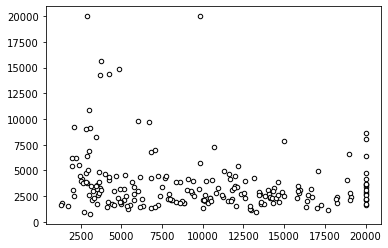

In [51]:
plt.scatter(
   a[:, 0], a[:, 1],
   c='white', marker='o',
   edgecolor='black', s=20
)
plt.show()

In [52]:
km=KMeans(n_clusters=4,n_jobs=5)
km.fit(onoff)
y_km=km.fit_predict(a)

C:\Users\mitha\anaconda3\envs\mining\lib\site-packages\sklearn\cluster\_kmeans.py:974: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  " removed in 0.25.", FutureWarning)
C:\Users\mitha\anaconda3\envs\mining\lib\site-packages\sklearn\cluster\_kmeans.py:974: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  " removed in 0.25.", FutureWarning)


In [53]:
y_km

array([1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 2, 1, 1, 1, 2, 2, 2, 2, 1, 1,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 2, 1, 2, 0, 1, 1, 1, 2,
       2, 1, 1, 1, 1, 1, 2, 2, 0, 1, 0, 0, 1, 2, 1, 0, 1, 0, 1, 2, 1, 2,
       0, 2, 0, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 0, 2, 2, 2, 1,
       1, 2, 0, 0, 2, 1, 1, 2, 2, 1, 1, 1, 1, 0, 0, 0, 3, 3, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 3, 3, 3, 3, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 3, 3, 0, 0, 3, 3, 0, 1, 1, 0, 0, 0, 2, 1, 0, 0,
       0, 1, 2, 0, 1, 1, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 2,
       0, 1, 0, 3, 3, 0, 0, 1, 0, 0, 0, 1, 0])

In [54]:
f = open("./Leisures/Description_Data_New/onoffdatas.pkl", 'wb')
pickle.dump(y_km,f)
f.close()

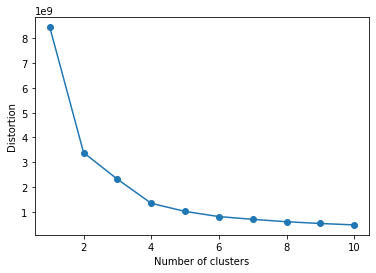

In [55]:
distortions = []
for i in range(1, 11):
    km = KMeans(
        n_clusters=i, init='random',
        n_init=10, max_iter=300,
        tol=1e-04, random_state=0
    )
    km.fit(a)
    distortions.append(km.inertia_)

# plot
plt.plot(range(1, 11), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

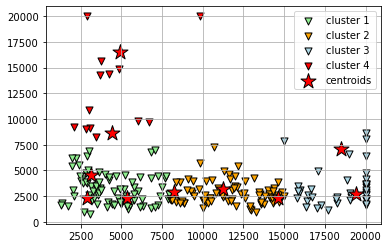

In [56]:
plt.scatter(
    a[y_km == 0, 0], a[y_km == 0, 1],
    s=50, c='lightgreen',
    marker='v', edgecolor='black',
    label='cluster 1'
)

plt.scatter(
    a[y_km == 1, 0], a[y_km == 1, 1],
    s=50, c='orange',
    marker='v', edgecolor='black',
    label='cluster 2'
)

plt.scatter(
    a[y_km == 2, 0], a[y_km == 2, 1],
    s=50, c='lightblue',
    marker='v', edgecolor='black',
    label='cluster 3'
)

plt.scatter(
    a[y_km == 3, 0], a[y_km == 3, 1],
    s=50, c='red',
    marker='v', edgecolor='black',
    label='cluster 4'
)



# plot the centroids
plt.scatter(
    km.cluster_centers_[:, 0], km.cluster_centers_[:, 1],
    s=250, marker='*',
    c='red', edgecolor='black',
    label='centroids'
)
plt.legend(scatterpoints=1)
plt.grid()
plt.show()

In [57]:
km.cluster_centers_[:, 0]

array([14638.91891892,  4404.9       , 19401.66666667,  4896.88729648,
        8255.38461538,  3170.17391304,  5343.15384615,  2874.35294118,
       18506.        , 11233.94444444])

- TF-IDF 시행
  - TF-IDF 사용을 위해 문장 전체를 재구성(진심인가...)

In [110]:
reconfig=[]
for row in leisure_dict_search:
    for obj in row:
        fread=open("./Leisures/Description_Data_New/"+obj+".pkl", 'rb')
        templist=pickle.load(fread)
        fread.close()
        templist=templist[:250]
        tempstring=""
        for index in templist:
            for i in range(index[1]):
                tempstring=tempstring+index[0]+" " 
        reconfig.append(tempstring)
        print(len(reconfig))

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211


In [111]:
f = open("./Leisures/Description_Data_New/reconfig.pkl", 'wb')
pickle.dump(reconfig,f)
f.close()#onoff data 저장

In [8]:
fread=open("./Leisures/Description_Data_New/reconfig.pkl", 'rb')
reconfig=pickle.load(fread)
fread.close()

In [9]:
#tf-idf
tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(reconfig)
doc_nouns_similarities = (tfidf_matrix * tfidf_matrix.T)

print(doc_nouns_similarities.toarray())

[[1.         0.90181135 0.60888576 ... 0.10823162 0.05281323 0.16562423]
 [0.90181135 1.         0.6271338  ... 0.13405379 0.078619   0.17115989]
 [0.60888576 0.6271338  1.         ... 0.20524733 0.06209836 0.13319471]
 ...
 [0.10823162 0.13405379 0.20524733 ... 1.         0.34737064 0.28993141]
 [0.05281323 0.078619   0.06209836 ... 0.34737064 1.         0.28343072]
 [0.16562423 0.17115989 0.13319471 ... 0.28993141 0.28343072 1.        ]]


In [10]:
f = open("./Leisures/Description_Data_New/correlation.pkl", 'wb')
pickle.dump(doc_nouns_similarities.toarray(),f)
f.close()#상관도 저장

In [43]:
fread=open("./Leisures/Description_Data_New/탁구_참여.pkl", 'rb')
templist=pickle.load(fread)
print(templist)

[('선수', 2823), ('대회', 2793), ('경기', 1686), ('팀', 1108), ('게임', 937), ('리그', 894), ('진행', 867), ('체육', 767), ('생활', 729), ('운동', 708), ('우승', 703), ('세계', 696), ('스포츠', 693), ('회원', 637), ('시간', 636), ('시작', 615), ('생각', 611), ('탁구장', 595), ('클럽', 567), ('참가', 542), ('사람', 535), ('한국', 509), ('중국', 466), ('복식', 463), ('개인', 460), ('전국', 439), ('회장', 438), ('단식', 434), ('개최', 431), ('강', 430), ('단체전', 428), ('대표', 423), ('치', 419), ('사진', 404), ('출전', 404), ('모습', 399), ('지역', 396), ('실력', 395), ('활동', 395), ('남자', 388), ('여자', 385), ('라켓', 383), ('시합', 383), ('장애', 377), ('공', 374), ('이벤트', 350), ('운영', 348), ('체육관', 347), ('센터', 345), ('동호회', 342), ('감사', 340), ('협회', 326), ('프로그램', 324), ('정도', 319), ('건강', 313), ('가능', 313), ('사용', 312), ('오픈', 311), ('대한', 305), ('지난', 304), ('조', 302), ('배', 302), ('어르신', 298), ('부', 291), ('동호인', 287), ('다음', 282), ('먹', 279), ('다양', 275), ('연습', 273), ('결과', 270), ('준비', 269), ('교실', 266), ('지원', 263), ('마음', 262), ('행사', 262), ('관심', 262), ('러버'

In [44]:
fread=open("./Leisures/Description_Data_New/축구_참가.pkl", 'rb')
templist=pickle.load(fread)
print(templist[:250])

[('팀', 2951), ('대회', 2750), ('경기', 2374), ('선수', 2023), ('아이', 931), ('리그', 924), ('유소년', 857), ('대표', 797), ('클럽', 705), ('교실', 660), ('올림픽', 644), ('학년', 633), ('우승', 545), ('진행', 512), ('조', 497), ('한국', 491), ('스포츠', 453), ('감독', 424), ('전국', 404), ('출전', 388), ('시작', 385), ('모습', 377), ('시간', 373), ('협회', 369), ('컵', 354), ('골', 349), ('반', 347), ('학교', 345), ('친구', 345), ('개최', 344), ('경기장', 314), ('생각', 298), ('준비', 295), ('서울', 294), ('대한민국', 287), ('국가', 287), ('훈련', 281), ('부', 280), ('예선', 279), ('여자', 276), ('사진', 273), ('뛰', 268), ('참여', 265), ('일정', 259), ('도쿄', 255), ('강', 254), ('운동장', 250), ('지역', 249), ('확인', 248), ('결과', 247), ('월드컵', 241), ('초등', 239), ('대한', 238), ('지난', 237), ('가능', 236), ('어린이', 236), ('상대', 234), ('게임', 233), ('응원', 228), ('대전', 224), ('코치', 219), ('진출', 215), ('운동', 214), ('행사', 211), ('일본', 207), ('체육', 206), ('다음', 204), ('교육', 203), ('아들', 198), ('경험', 194), ('패', 192), ('축구팀', 191), ('블로그', 191), ('풋살', 187), ('승리', 183), ('드론', 182), ('북한'

In [79]:
fread=open("./Leisures/Description_Data_New/친지_방문.pkl", 'rb')
templist=pickle.load(fread)
print(templist[:250])

[('추석', 1586), ('방역', 1552), ('비자', 1506), ('가족', 1337), ('기간', 1283), ('연휴', 1252), ('시설', 1231), ('여행', 1099), ('가능', 980), ('집', 976), ('시간', 972), ('이용', 942), ('입국', 927), ('이상', 904), ('사람', 838), ('한국', 829), ('거리', 823), ('설', 809), ('먹', 797), ('명절', 791), ('자제', 787), ('운영', 778), ('금지', 752), ('체류', 744), ('고향', 664), ('발급', 652), ('지역', 631), ('마스크', 611), ('관광', 607), ('신청', 605), ('목적', 599), ('필요', 593), ('미국', 580), ('착용', 558), ('확인', 554), ('서류', 532), ('수칙', 528), ('안전', 523), ('예약', 513), ('생활', 512), ('관리', 498), ('시', 494), ('서비스', 477), ('사회', 474), ('외국인', 471), ('활동', 471), ('곳', 467), ('단기', 466), ('준비', 460), ('이동', 457), ('온라인', 454), ('상황', 454), ('발생', 453), ('제한', 451), ('마음', 449), ('두기', 448), ('음식', 444), ('격리', 443), ('생각', 439), ('확산', 439), ('감염', 431), ('확진', 430), ('중국', 427), ('특별', 427), ('정부', 422), ('인원', 420), ('조치', 419), ('연장', 419), ('대한', 418), ('대책', 417), ('정보', 417), ('개인', 412), ('건강', 409), ('단계', 409), ('문화', 409), ('최소', 404), ('따라

In [28]:
new_list=str(esports)
print(new_list)

[('之', 19273), ('사람', 14101), ('선생', 5134), ('신', 5061), ('죽', 5021), ('먹', 4994), ('마음', 4333), ('생각', 4155), ('爲', 3689), ('先生', 3431), ('나라', 3181), ('물', 3122), ('색소', 3071), ('뒤', 2745), ('힘', 2721), ('세계', 2640), ('인간', 2604), ('병', 2499), ('可', 2479), ('臣', 2244), ('시간', 2213), ('우주', 2186), ('金', 2179), ('이상', 2176), ('상', 2176), ('자신', 2166), ('돼', 2160), ('그러', 2137), ('따라', 2132), ('시', 2125), ('길', 2117), ('神', 2106), ('세상', 2063), ('전하', 1980), ('집', 1948), ('불', 1938), ('암', 1932), ('법', 1931), ('산', 1881), ('쓰', 1864), ('대한', 1854), ('피', 1851), ('뜻', 1845), ('죽염', 1835), ('몸', 1832), ('사진', 1831), ('시작', 1825), ('서울', 1821), ('경기', 1798), ('공', 1792), ('곳', 1780), ('鄭', 1745), ('정신', 1700), ('타', 1695), ('時', 1692), ('화', 1658), ('아들', 1637), ('다음', 1609), ('하루', 1605), ('자연', 1603), ('정도', 1602), ('분자', 1600), ('모르', 1543), ('간', 1537), ('생기', 1470), ('듣', 1454), ('지구', 1432), ('中', 1425), ('만들', 1411), ('李', 1394), ('화하', 1390), ('상소', 1382), ('道', 1372), ('수', 1358),

- 아래는 온/오프라인별 주요 단어 추출

In [45]:
hobbysonoff=[]
fread=open("./Leisures/Text/비대면_취미.txt", 'r',encoding='UTF8')
templist=fread.read()
tempresult=mecab_nouns(templist)
text=nltk.Text(tempresult,name='비대면_취미')
hobbysonoff.append(text.vocab().most_common(200))

In [46]:
fread=open("./Leisures/Text/온라인_취미.txt", 'r',encoding='UTF8')
templist=fread.read()
tempresult=mecab_nouns(templist)
text=nltk.Text(tempresult,name='온라인_취미')
hobbysonoff.append(text.vocab().most_common(200))

1632972


In [47]:
fread=open("./Leisures/Text/오프라인_취미.txt", 'r',encoding='UTF8')
templist=fread.read()
tempresult=mecab_nouns(templist)
text=nltk.Text(tempresult,name='오프라인_취미')
hobbysonoff.append(text.vocab().most_common(200))

In [48]:
fread=open("./Leisures/Text/야외_취미.txt", 'r',encoding='UTF8')
templist=fread.read()
tempresult=mecab_nouns(templist)
text=nltk.Text(tempresult,name='야외_취미')
hobbysonoff.append(text.vocab().most_common(200))

In [76]:
hobbylist=[]
for row in hobbysonoff:
    hobby=[]
    for obj in row:
        hobby.append(obj[0])
        print(type(obj[1]))
    hobbylist.append(hobby)

<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class

In [41]:
if '마음' in hobbylist:
    print("hello")

In [50]:
onlinelist=hobbylist[0]+hobbylist[1]
offlinelist=hobbylist[2]+hobbylist[3]
online=[]
offline=[]
for obj in onlinelist:
    if obj not in offlinelist:
        online.append(obj)
for obj in offlinelist:
    if obj not in onlinelist:
        offline.append(obj)

In [51]:
online

['비대',
 '피아노',
 '기업',
 '시대',
 '학교',
 '대면',
 '사회',
 '택트',
 '언',
 '학생',
 '단체',
 '상황',
 '전화',
 '화상',
 '한국',
 '학습',
 '문의',
 '방식',
 '보컬',
 '기관',
 '도서관',
 '출강',
 '변화',
 '줌',
 '진주',
 '사업',
 '봉사',
 '원예',
 '청소년',
 '관리',
 '감사',
 '인해',
 '정원',
 '예술',
 '대상',
 '영어',
 '목공',
 '지갑',
 '룻',
 '콘텐츠',
 '모집',
 '실',
 '소통',
 '안내',
 '준비물',
 '마스터',
 '비스킷',
 '아이패드',
 '배워',
 '츠',
 '마크라메',
 '색연필',
 '프리',
 '패스',
 '클',
 '사회',
 '편하',
 '래스',
 '마이비',
 '평생',
 '스킷',
 '요리',
 '하비',
 '프랑스',
 '장점',
 '파스텔',
 '비누',
 '간단',
 '일러스트',
 '비대',
 '부담',
 '강',
 '만든',
 '오일',
 '핸드',
 '패키지',
 '글씨']

In [44]:
offline

['야외',
 '촬영',
 '캠핑',
 '스케치',
 '화실',
 '등산',
 '발레',
 '웨딩',
 '시장',
 '자연',
 '커피',
 '자전거',
 '풍경',
 '분위기',
 '나가',
 '이야기',
 '행복',
 '나무',
 '다니',
 '맛있',
 '부케',
 '가족',
 '가을',
 '자리',
 '미니',
 '공원',
 '꽃집',
 '갔',
 '느끼',
 '산',
 '엄마',
 '주문',
 '산책',
 '드론',
 '스포츠',
 '넓',
 '보여',
 '합니다',
 '밖',
 '장소',
 '스트레스',
 '혼자',
 '시원',
 '이야기',
 '매장',
 '읽',
 '정보',
 '구입',
 '샵',
 '경험',
 '관련',
 '와인',
 '상품',
 '인터넷',
 '창업',
 '청년',
 '앱',
 '플',
 '파티',
 '드',
 '쇼핑',
 '달',
 '갖',
 '발레',
 '홈페이지',
 '이유',
 '카드',
 '공유',
 '목표']

In [142]:
fread=open("./Leisures/Text/맨손_체조_참여.txt", 'r',encoding='UTF8')
templist=fread.read()
tempresult=mecab_nouns(templist)
text=nltk.Text(tempresult,name='외식')
text.vocab().most_common(250)

[('운동', 5322),
 ('시간', 2355),
 ('체조', 2278),
 ('어르신', 2256),
 ('활동', 2108),
 ('건강', 1896),
 ('센터', 1825),
 ('사람', 1616),
 ('프로그램', 1523),
 ('참여', 1481),
 ('보호', 1319),
 ('생활', 1239),
 ('생각', 1169),
 ('몸', 1165),
 ('노인', 1087),
 ('시작', 1048),
 ('신체', 1044),
 ('주간', 1043),
 ('진행', 1009),
 ('체육', 978),
 ('손', 947),
 ('만들', 940),
 ('교육', 919),
 ('정도', 918),
 ('먹', 874),
 ('방법', 859),
 ('대한', 855),
 ('길', 832),
 ('다양', 820),
 ('학교', 806),
 ('이용', 801),
 ('준비', 791),
 ('필요', 789),
 ('걷', 786),
 ('아이', 775),
 ('마음', 771),
 ('이상', 765),
 ('근육', 756),
 ('자신', 735),
 ('따라', 725),
 ('수업', 716),
 ('효과', 708),
 ('학생', 686),
 ('맨손', 671),
 ('동작', 671),
 ('하루', 635),
 ('곳', 635),
 ('찾', 628),
 ('집', 626),
 ('스트레칭', 621),
 ('스포츠', 618),
 ('사회', 614),
 ('모습', 612),
 ('잡', 609),
 ('관리', 606),
 ('사용', 604),
 ('이야기', 600),
 ('치료', 597),
 ('아침', 588),
 ('중요', 586),
 ('책', 582),
 ('기능', 579),
 ('놀이', 567),
 ('도움', 554),
 ('학습', 553),
 ('체력', 545),
 ('예방', 541),
 ('과정', 540),
 ('읽', 534),
 ('활용', 531),
 ('운영

In [7]:
fread=open("./Leisures/Description_Data_New/correlation.pkl", 'rb')
temp=pickle.load(fread)
fread.close()
bones=pd.DataFrame(temp)

In [8]:
bones

,0,1,2,3,4,5,6,7,8,9,...,201,202,203,204,205,206,207,208,209,210
0,1.000000,0.901811,0.608886,0.781737,0.422173,0.153628,0.149917,0.121489,0.220757,0.088846,...,0.029996,0.015479,0.039317,0.059336,0.040349,0.084373,0.031545,0.108232,0.052813,0.165624
1,0.901811,1.000000,0.627134,0.831878,0.481548,0.145338,0.139008,0.113648,0.241190,0.099477,...,0.037214,0.018288,0.056720,0.070297,0.047474,0.119339,0.034713,0.134054,0.078619,0.171160
2,0.608886,0.627134,1.000000,0.682047,0.388383,0.112477,0.108082,0.099555,0.219725,0.061243,...,0.036763,0.019322,0.046132,0.061018,0.043945,0.074717,0.024502,0.205247,0.062098,0.133195
3,0.781737,0.831878,0.682047,1.000000,0.460597,0.139484,0.133906,0.106327,0.227851,0.087331,...,0.040732,0.018774,0.058015,0.078377,0.053924,0.109248,0.033300,0.166119,0.086900,0.162514
4,0.422173,0.481548,0.388383,0.460597,1.000000,0.105126,0.104950,0.174615,0.354507,0.063549,...,0.039723,0.023093,0.063719,0.074317,0.041932,0.129643,0.032987,0.120814,0.066583,0.133329
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
206,0.084373,0.119339,0.074717,0.109248,0.129643,0.051113,0.043145,0.043504,0.073876,0.070697,...,0.094238,0.033590,0.338769,0.265950,0.097003,1.000000,0.104948,0.264878,0.329443,0.248170
207,0.031545,0.034713,0.024502,0.033300,0.032987,0.028968,0.029836,0.015472,0.022057,0.034983,...,0.028755,0.007881,0.030439,0.095203,0.042263,0.104948,1.000000,0.075669,0.122431,0.041104
208,0.108232,0.134054,0.205247,0.166119,0.120814,0.056009,0.042689,0.054082,0.093369,0.054314,...,0.100068,0.050936,0.210962,0.173244,0.262378,0.264878,0.075669,1.000000,0.347371,0.289931
209,0.052813,0.078619,0.062098,0.086900,0.066583,0.027096,0.021939,0.020806,0.045822,0.045617,...,0.056760,0.025659,0.346033,0.116611,0.202387,0.329443,0.122431,0.347371,1.000000,0.283431
